## California Regression Activity 

### Description

Practice linear regressions

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame

## Procedure

For this activity, you are going to make an initial guess or hypothesis about which features best represent the California dataset. You are first going to perform a regression of just a subset of the features you choose, then you are going to perform a regression with all of the features.  The steps for performing a linear regression with sciKit learn are as follows: 
 1. Load Data (Which includes separating the data into X and y)
 2.Do some initial visualizations (e.g., scatter plots or visualizations with 2 or 3 features or a feature vs. the target, maybe some histograms).
 3. Split data using train_test_split()
 4. Create lr object
 5. Train the lr model
 6. Test the lr model
 
Note: You do NOT need to do final visualizations like when we used simulated data.

Compare the results of both models and discuss why you think one performed better than the other.

### Load the California Housing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing    
housing = fetch_california_housing()
Cali = pd.DataFrame(data=housing.data, columns=housing.feature_names)
# technically the median home value is supposed to be the target, however I combine it with the rest of the data so I can predict something else if I want to 
Cali['MEDV'] = housing.target
Cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


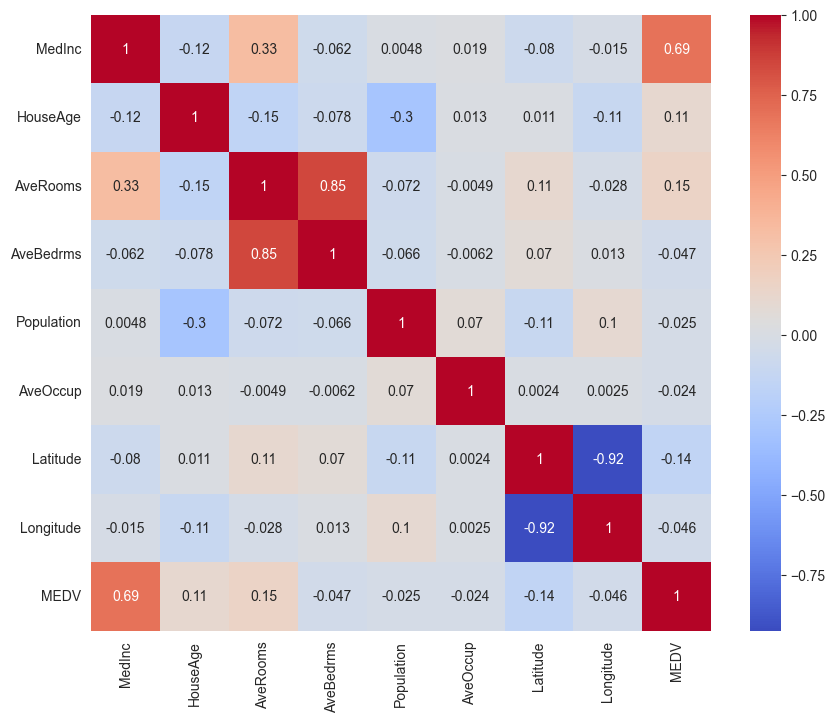

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(Cali.corr(), annot=True, cmap='coolwarm')

plt.show()

This is sort of cheating but it's a great way to see what correlations occurred in the dataset I can also see there might be an issue with colinearity between average rooms and average bedrooms

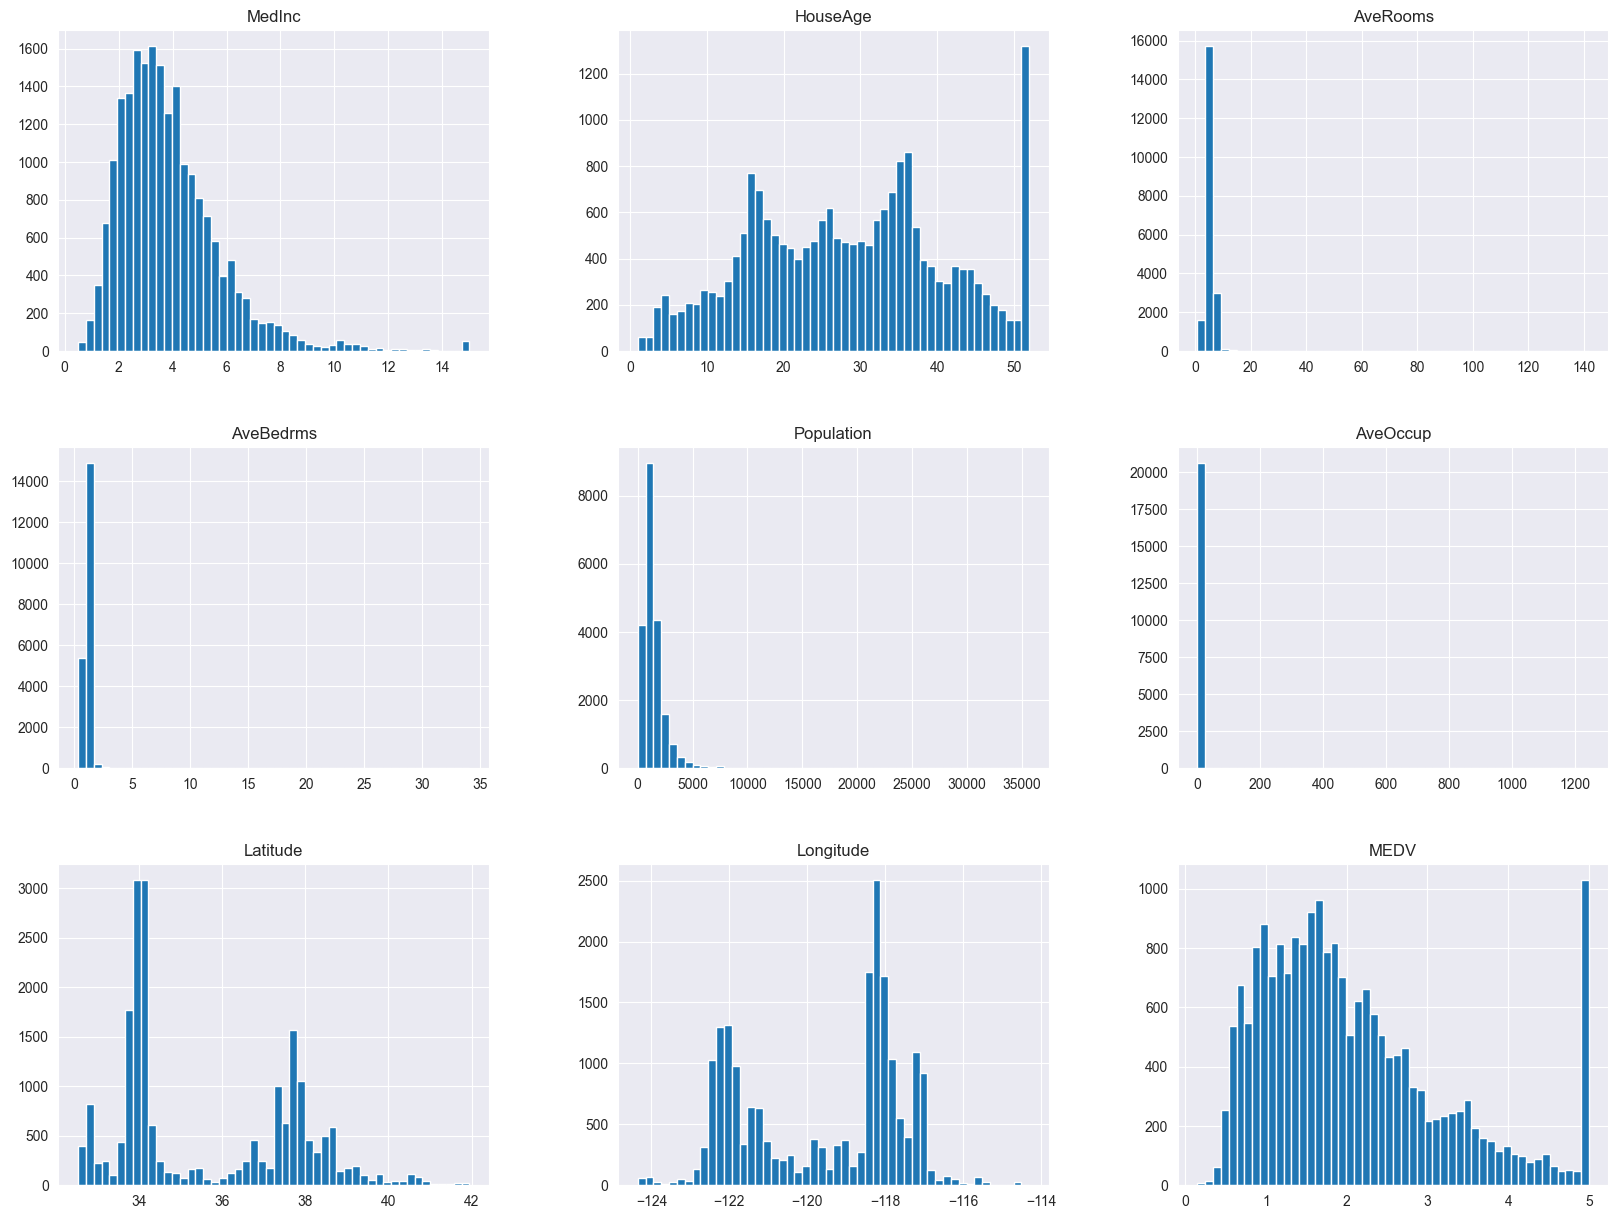

In [5]:
Cali.hist(bins=50, figsize=(20,15))

plt.show()

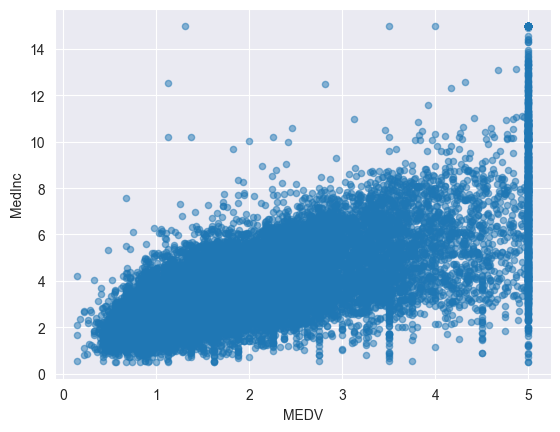

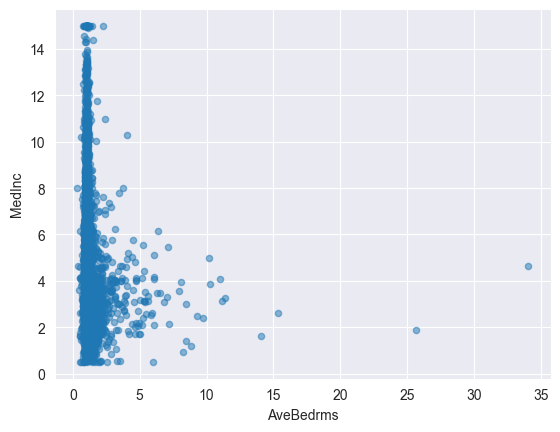

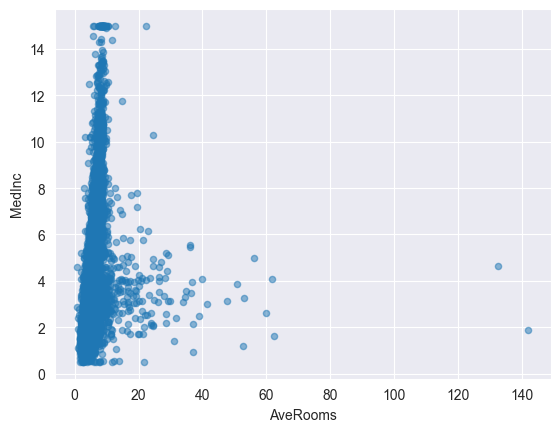

In [6]:
Cali.plot(kind="scatter", x='MEDV', y='MedInc', alpha=0.5)
plt.show()

Cali.plot(kind="scatter", x='AveBedrms', y='MedInc', alpha=0.5)
plt.show()

Cali.plot(kind="scatter", x='AveRooms', y='MedInc', alpha=0.5)
plt.show()

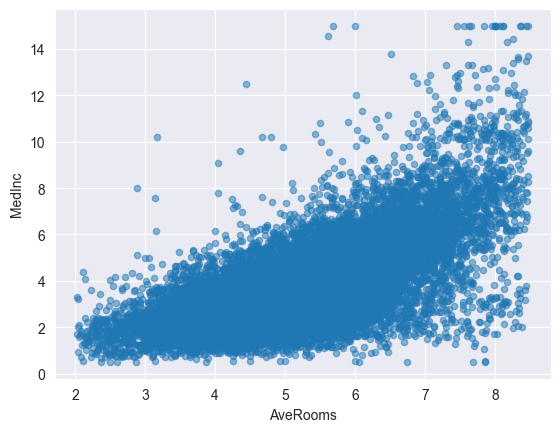

In [7]:
'''
Since this is a niche bit of code, this code is adapted from a research project I am working on.
here is a link to my github repository as a source: https://github.com/Coopsims/MethaneDataScience/blob/main/Ben_s_Analysis/Equation%20Generation/Equation%20generation%20V2.ipynb

The purpose of this code is to remove the outliers that squash the data so I can see in general what the trend looks like for the average bit of data. That being said, all of the data will be used for training some is just taken out here for ease of visibility.
'''

# Define IQR range
q1_rooms, q3_rooms = np.percentile(Cali['AveRooms'], [25, 75])
iqr_rooms = q3_rooms - q1_rooms

# Filter outliers from 'AveRooms'
Cali_filtered = Cali[((Cali['AveRooms'] >= (q1_rooms - 1.5 * iqr_rooms)) & (Cali['AveRooms'] <= (q3_rooms + 1.5 * iqr_rooms)))]

# Scatter plot
Cali_filtered.plot(kind="scatter", x='AveRooms', y='MedInc', alpha=0.5)
plt.show()

### Hypothesis

What is your hypothesis?

Answer: The median income can be directly predicted, based on the house value, number of rooms, and number of bedrooms within 85% accuracy of using all data. 

 After looking at the scatterplots which look at median value, average bedrooms, and average rooms. It appears that all three have a mostly linear correlation, however, the outliers make it difficult to truly see what is going on for the average rooms as it squashes the data together. Having removed many of the outliers, the general trend becomes much easier to see and it appears there is a correlation through the visuals

In [19]:
#Load dataset
X = Cali[[ 'MEDV', 'AveRooms', 'AveBedrms']]
y = Cali['MedInc']

#Split data into testing and training 
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [20]:
#Create lr object
linReg1 = LinearRegression(fit_intercept = True)

#Train model
linReg1.fit(xtrain, ytrain)

#Test model
score1 = linReg1.score(xtest, ytest)

print("For my features: ", score1)


For my features:  0.6775824487264772


### Full Dataset

In [21]:
#Load dataset
X = Cali[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV']]
y = Cali['MedInc']

#Split data into testing and training 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:

#Create lr object
linReg1 = LinearRegression(fit_intercept=True)

#Train model
linReg1.fit(xtrain, ytrain)

#Test model 
score2 = linReg1.score(xtest, ytest)

print("For all features: ", score2)

For all features:  0.6875602314945023


### Discussion

Which result is better, and why?

Answer: The result was the full data set is better due to the fact that there might be certain nuances in the population, latitude and longitude, which might provide that extra 1% accuracy gain over the model that I trained. However one thing to look out for is redundant information in the trained model.

In [25]:
# TODO: Now technically I'm done, but there are better calculated ways of doing this, so I am now just messing around in the file
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Initialize a classifier (Linear regression model)
lr = LinearRegression()

# Jointly select 5 best features with forward stepwise selection
sfs_forward = SFS(lr,
                  k_features=3,
                  forward=True,
                  floating=False,
                  scoring='neg_mean_squared_error',
                  cv=5)

# Fit SFS to data
sfs_forward = sfs_forward.fit(xtrain, ytrain)

# Fit SFS to data
xtrain_selected = sfs_forward.transform(xtrain)
lr_fitted = lr.fit(xtrain_selected, ytrain)

# Transform the test data to select the same features
xtest_selected = sfs_forward.transform(xtest)

# Score the model on the transformed test data
score3 = lr_fitted.score(xtest_selected, ytest)
# Score the model on the transformed test data
score3 = sfs_forward.estimator.score(xtest_selected, ytest)
print("For my features: ", score3)

comparison = ((score3 / score2) - 1) * 100
print("Percent comparison of model compared to all info in dataset: ", comparison)

# Output the selected feature indices
print('Selected features:', sfs_forward.k_feature_idx_)

"""
if the X input is ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV'] where it starts from 0 and goes to 7, this method is showing that the average rooms, average Bedrooms, and median value are the three most impactful features present in the dataset. this reaffirms my hypothesis that those three traits would be significantly more important than the rest.
"""


For my features:  0.6775824487264823
Total accuracy compared to full model:  -1.4511867195012074
Selected features: (1, 2, 7)


"\nif the X input is ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV'] where it starts from 0 and goes to 7, this method is showing that the average rooms, average Bedrooms, and median value are the three most impactful features present in the dataset. this reaffirmms my hypothesis that those three traits would be significantly more important than the rest.\n"

So this model performed 1.4% worse than the model with all data

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1) # the regularization strength of L1
lasso.fit(xtrain, ytrain)

# Generate R-Squared score
score = lasso.score(xtest, ytest)
print("R-Squared Score: ", score)
comparison = ((score / score2) - 1) * 100
print("Total accuracy compared to full model: ", comparison)

R-Squared Score:  0.31359964854212985
Total accuracy compared to full model:  -54.38950157712294


This model, using a lasso regression perfromed 0.8% better than the model with all items

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1) # the regularization strength of L2
ridge.fit(xtrain, ytrain)

# To make predictions
score = ridge.score(xtest, ytest)
print("R-Squared Score: ", score)
comparison = ((score / score2) - 1) * 100
print("Total accuracy compared to full model: ", comparison)

R-Squared Score:  0.6877626193744515
Total accuracy compared to full model:  0.02943565824178318


In [32]:
# now that there is a baseline we can do really silly things
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

# cross-validation
cv_strategy = RepeatedKFold(n_splits=10, n_repeats=1)

# create a set of possible alpha values
alphas = np.logspace(-4, 4, 1000)

ridge = RidgeCV(alphas=alphas, cv=cv_strategy)
ridge.fit(xtrain, ytrain)

# print out the best alpha value
print('Best alpha: ', ridge.alpha_)

Best alpha:  0.0001


In [33]:
# now that there is a baseline we can do really silly things
from sklearn.linear_model import LassoCV

# cross-validation
cv_strategy = RepeatedKFold(n_splits=10, n_repeats=3)

# create a set of possible alpha values
alphas = np.logspace(-2, 2, 10000)

ridge = LassoCV(alphas=alphas, cv=cv_strategy, n_jobs=-1)
ridge.fit(xtrain, ytrain)

# print out the best alpha value
print('Best alpha: ', ridge.alpha_)

Best alpha:  0.01


In [34]:
# Repeating but now with optymized alphas
lasso = Lasso(alpha=0.01)  # the regularization strength of L1
lasso.fit(xtrain, ytrain)

# Generate R-Squared score
score = lasso.score(xtest, ytest)
print("R-Squared Score: ", score)
comparison = ((score / score2) - 1) * 100
print("Total accuracy compared to full model: ", comparison)


ridge = Ridge(alpha=0.0001)  # the regularization strength of L2
ridge.fit(xtrain, ytrain)

# To make predictions
score = ridge.score(xtest, ytest)
print("R-Squared Score: ", score)
comparison = ((score / score2) - 1) * 100
print("Total accuracy compared to full model: ", comparison)

R-Squared Score:  0.693668467735324
Total accuracy compared to full model:  0.8883928943279162
R-Squared Score:  0.6875602518109767
Total accuracy compared to full model:  2.954864664062029e-06
